# Forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_csv('../london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Opis karakteristika
| Karakteristika | Opis
| -------- | ------- |
| date | Datum merenja |
| cloud_cover | Oblačnost merena u oktama |
| sunshine | Broj sunčanih sati u danu |
| global_radiation | Zračenje mereno u vatima po metru kvadratnom |
| max_temp  | Maksimalna temperatura u toku dana |
| mean_temp  | Srednja temperatura u toku dana   |
| min_temp |  Minimalna temperatura u toku dana |
| precipitation |  Padavine izražene u milimetrima   |
| pressure | Atmosferski pritisak izražen u Paskalima  |
| snow_depth | Visina snežnog pokrivača u milimetrima   |

In [4]:
df.isna().sum().sort_values(ascending=False)

snow_depth          1441
mean_temp             36
cloud_cover           19
global_radiation      19
max_temp               6
precipitation          6
pressure               4
min_temp               2
date                   0
sunshine               0
dtype: int64

In [5]:
df['snow_depth']=df['snow_depth'].fillna(0)

In [6]:
df['date'].head()

0    19790101
1    19790102
2    19790103
3    19790104
4    19790105
Name: date, dtype: int64

In [7]:
df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')
'''df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day'''

"df['year'] = df['date'].dt.year\ndf['month'] = df['date'].dt.month\ndf['day'] = df['date'].dt.day"

In [8]:
print(df['date'].max())
print(df['date'].min())
df = df.set_index("date")

2020-12-31 00:00:00
1979-01-01 00:00:00


In [9]:
interp_cols = ['max_temp', 'min_temp', 'mean_temp', 'pressure',
               'global_radiation', 'cloud_cover',"precipitation"]

# time-aware interpolation; limit avoids long bridges
df[interp_cols] = (
    df[interp_cols]
      .interpolate(method='time', limit=3, limit_direction='both')
      .ffill().bfill()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


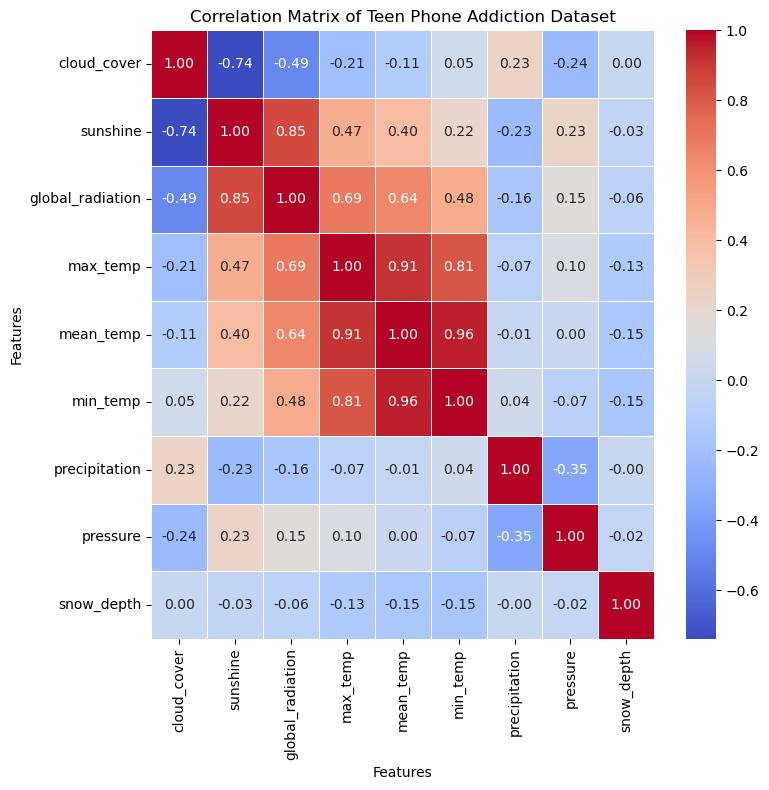

In [11]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

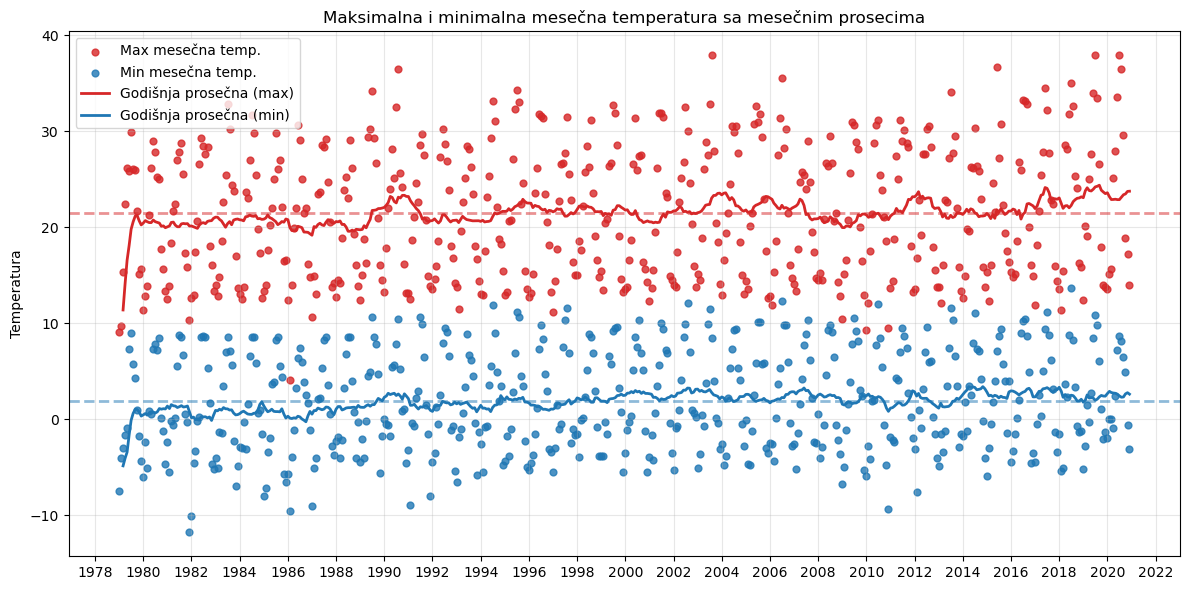

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Mesečni ekstremi temperatura
mx = df['max_temp'].resample('MS').max()
mn = df['min_temp'].resample('MS').min()

# Rolling averages (12 months; tweak window as needed)
window = 12
mx_ma = mx.rolling(window, min_periods=3).mean()
mn_ma = mn.rolling(window, min_periods=3).mean()

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(mx.index, mx.values, color='tab:red', s=24, alpha=0.8, label='Max mesečna temp.')
ax.scatter(mn.index, mn.values, color='tab:blue', s=24, alpha=0.8, label='Min mesečna temp.')

ax.plot(mx_ma.index, mx_ma.values, color='tab:red', lw=2, label=f'Godišnja prosečna (max)')
ax.plot(mn_ma.index, mn_ma.values, color='tab:blue', lw=2, label=f'Godišnja prosečna (min)')

# Optional overall mean (dashed)
ax.axhline(mx.mean(), color='tab:red', ls='--', lw=2, alpha=0.5)
ax.axhline(mn.mean(), color='tab:blue', ls='--', lw=2, alpha=0.5)

ax.set_title('Maksimalna i minimalna mesečna temperatura sa mesečnim prosecima')
ax.set_xlabel('')
ax.set_ylabel('Temperatura')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()


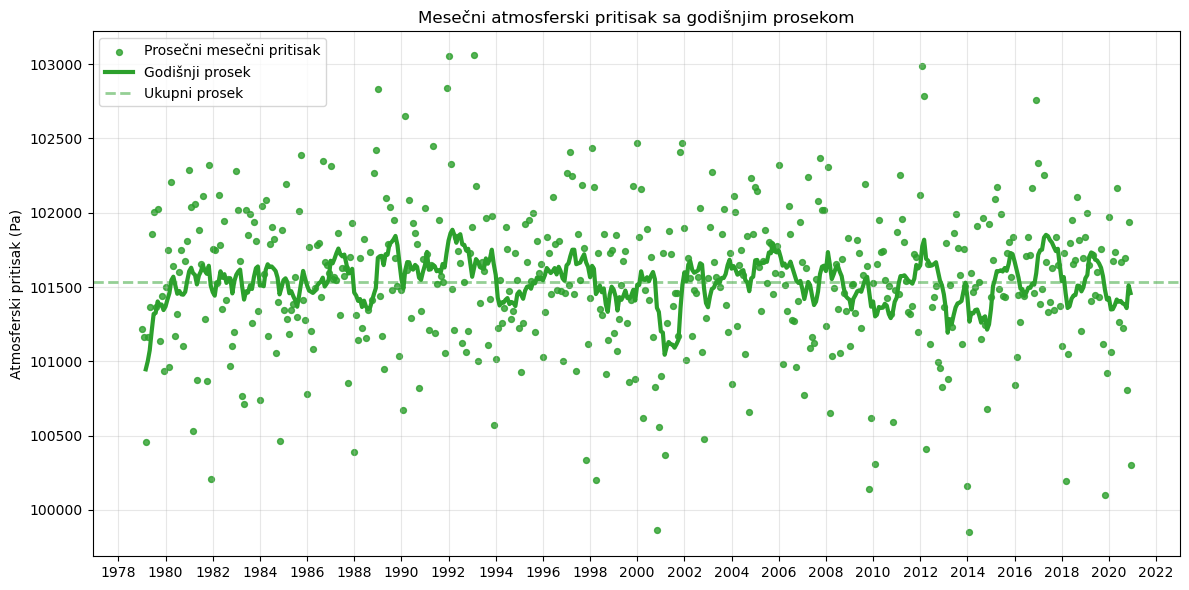

In [13]:
mean_p = df['pressure'].resample('MS').mean()
mean_ma = mean_p.rolling(12, min_periods=3).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(mean_p.index, mean_p.values, s=18, color='tab:green', alpha=0.8, label='Prosečni mesečni pritisak')
ax.set_ylabel('Atmosferski pritisak (Pa)')
ax.plot(mean_ma.index, mean_ma.values, color='tab:green', lw=3, label='Godišnji prosek')
ax.axhline(mean_p.mean(), color='tab:green', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title('Mesečni atmosferski pritisak sa godišnjim prosekom')
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

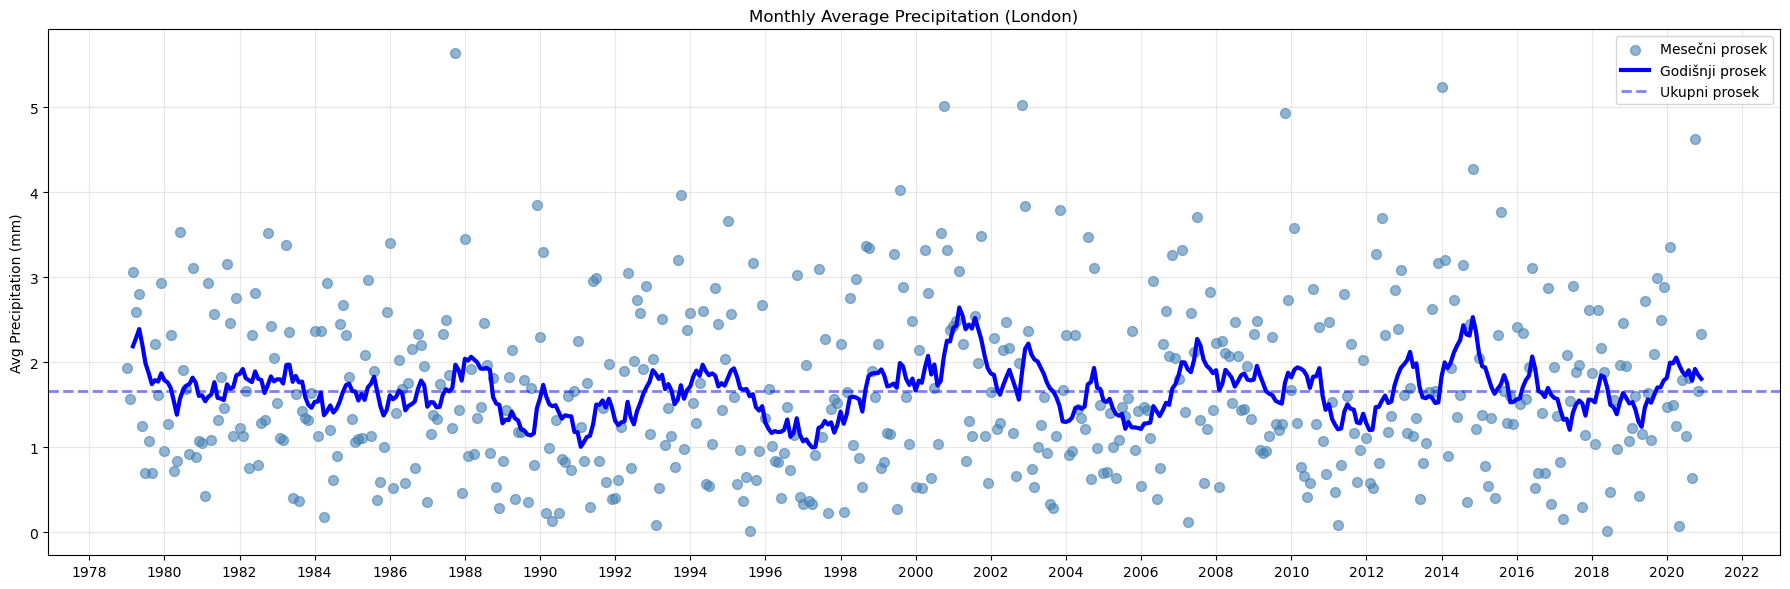

In [14]:
monthly_precip = df["precipitation"].resample("MS").mean()
mean_mp = monthly_precip.rolling(12, min_periods=3).mean()
# Plot monthly averages (with time index)
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(monthly_precip.index, monthly_precip.values, color="steelblue", s=50, alpha=0.6, label='Mesečni prosek')
ax.plot(mean_mp.index, mean_mp.values, color='blue', lw=3, label='Godišnji prosek')
ax.axhline(monthly_precip.mean(), color='blue', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title("Monthly Average Precipitation (London)")
ax.set_ylabel("Avg Precipitation (mm)")
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

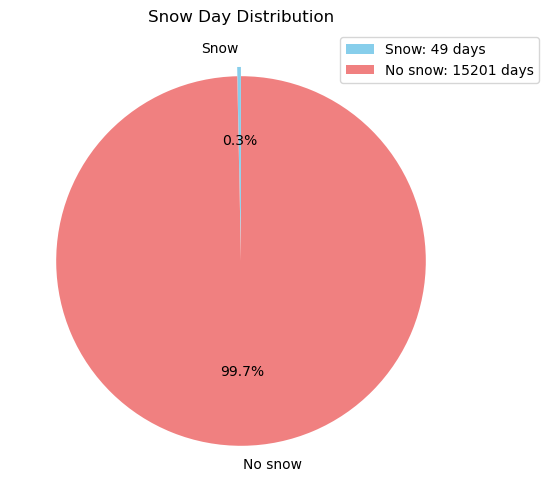

In [15]:
# Create target variable distribution
snow_counts = pd.Series({
    "Snow": df['snow_depth'].where(lambda x: x>0).value_counts().values[0],
    "No snow": df['snow_depth'].where(lambda x: x==0).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
snow_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Snow Day Distribution")
labels = [f"{cat}: {count} days" for cat, count in snow_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.ylabel("")
plt.show()

In [16]:
df['rain_tommorrow']=df['precipitation'].shift(-1).astype(bool)
df=df.iloc[:-1]

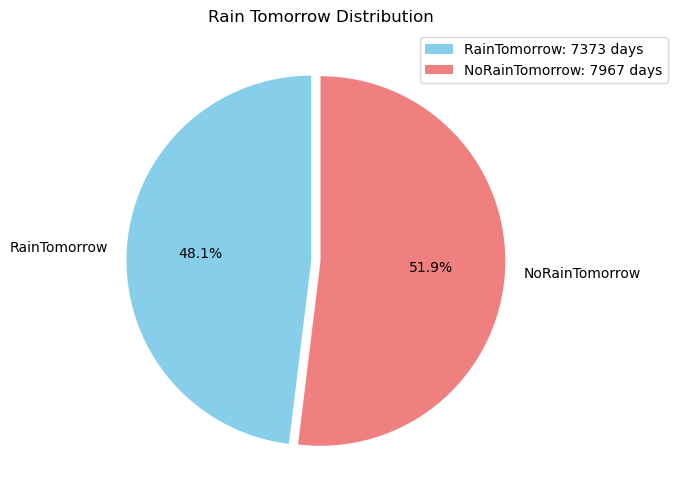

In [17]:
# Create target variable distribution
rain_counts = pd.Series({
    "RainTomorrow": df['rain_tommorrow'].where(lambda x: x==True).value_counts().values[0],
    "NoRainTomorrow": df['rain_tommorrow'].where(lambda x: x==False).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
rain_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Rain Tomorrow Distribution")
plt.ylabel("")
labels = [f"{cat}: {count} days" for cat, count in rain_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.show()

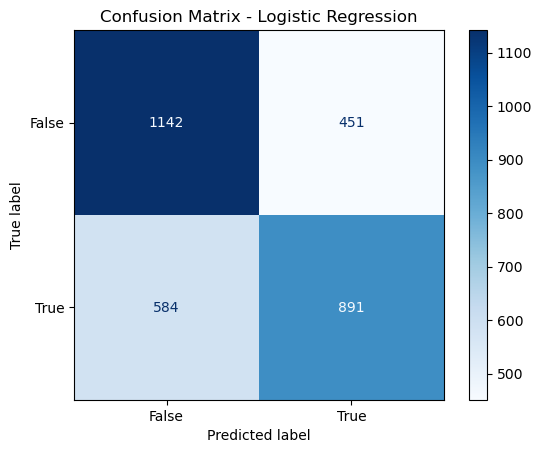

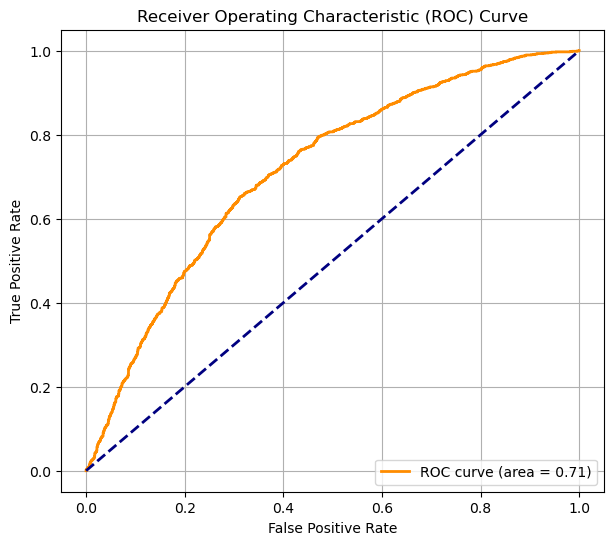

[False  True]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


X = df.drop(columns=["precipitation", "rain_tommorrow"])
y = df["rain_tommorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_val:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(log_reg.classes_)

In [18]:
# Simplified table: just accuracy, precision, recall, f1 for each class + ROC-AUC
metrics_simple = {
    "Accuracy": report["accuracy"],
    "Precision (No Rain)": report['False']["precision"],
    "Precision (Rain)": report['True']["precision"],
    "Recall (No Rain)": report["False"]["recall"],
    "Recall (Rain)": report['True']["recall"],
    "F1-score (No Rain)": report["False"]["f1-score"],
    "F1-score (Rain)": report['True']["f1-score"],
    "ROC-AUC": roc_auc
}
metrics_simple = {k: round(v, 2) for k, v in metrics_simple.items()}
metrics_simple_df = pd.DataFrame(metrics_simple, index=["Logistic Regression"]).T
display(metrics_simple_df)


,Logistic Regression
Accuracy,0.66
Precision (No Rain),0.66
Precision (Rain),0.66
Recall (No Rain),0.72
Recall (Rain),0.60
F1-score (No Rain),0.69
F1-score (Rain),0.63
ROC-AUC,0.71


## Neural Network

In [19]:
x = df.copy()
x.drop(columns=['rain_tommorrow','precipitation'], inplace=True)
y = df['rain_tommorrow']
x.info()
y.info()
x.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   pressure          15340 non-null  float64
 7   snow_depth        15340 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
<class 'pandas.core.series.Series'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Series name: rain_tommorrow
Non-Null Count  Dtype
--------------  -----
15340 non-null  bool 
dtypes: bool(1)
memory usage: 134.8 KB


((15340, 8), (15340,))

In [20]:
from sklearn.preprocessing import StandardScaler
n = len(x)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

(len(x_train_s), len(x_val), len(x_test))

(10738, 2301, 2301)

In [21]:
import tensorflow as tf
def build_model(input_dim, seed=42):
    tf.keras.utils.set_random_seed(seed)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model(x_train_s.shape[1])
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    x_train_s, y_train,
    validation_data=(x_val_s, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)


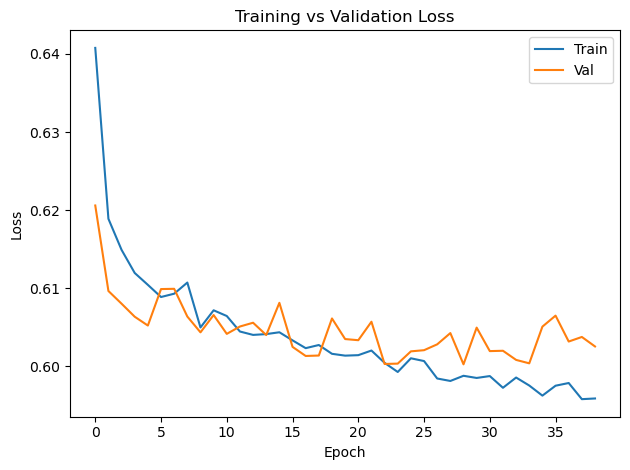

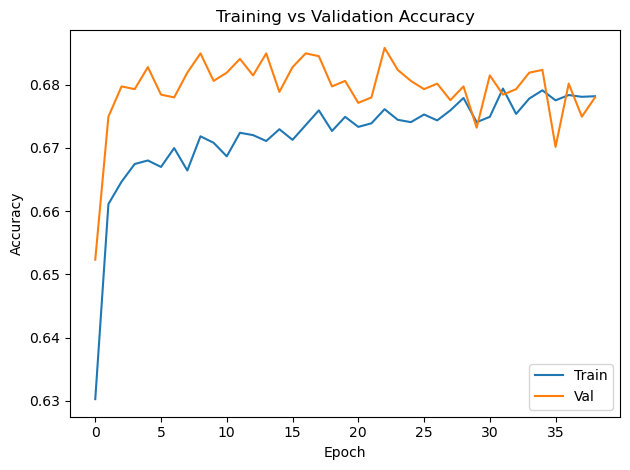

In [22]:

# Loss
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.tight_layout()
plt.show()

# Accuracy (if available)
if "accuracy" in history.history and "val_accuracy" in history.history:
    plt.figure()
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Val"])
    plt.tight_layout()
    plt.show()


72/72 [==============================] - 0s 1ms/step
Test Accuracy: 0.6832
Test ROC-AUC: 0.7424197046838557
Confusion Matrix:
 [[768 420]
 [309 804]]


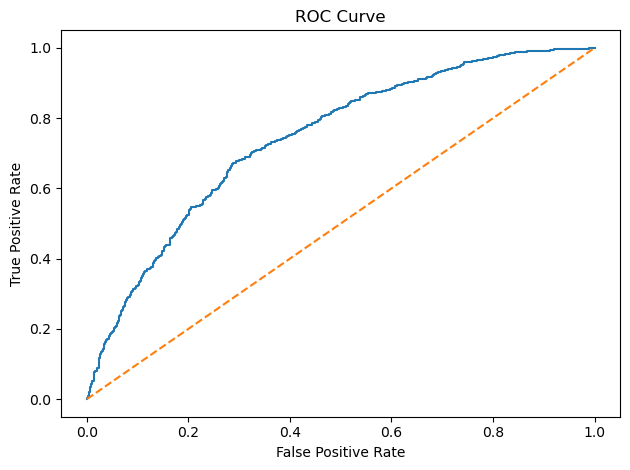

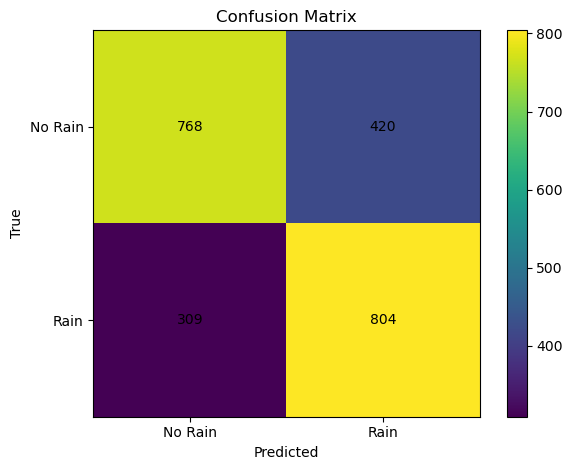

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

proba_test = model.predict(x_test_s).ravel()
pred_test = (proba_test >= 0.5).astype(int)

acc = accuracy_score(y_test, pred_test)
try:
    auc = roc_auc_score(y_test, proba_test)
except ValueError:
    auc = float("nan")

cm = confusion_matrix(y_test, pred_test)
print(f"Test Accuracy: {acc:.4f}")
print("Test ROC-AUC:", auc if (isinstance(auc, float) and not np.isnan(auc)) else "N/A")
print("Confusion Matrix:\n", cm)

# ROC curve
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, proba_test)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.tight_layout()
    plt.show()

# Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["No Rain", "Rain"])
plt.yticks([0,1], ["No Rain", "Rain"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

#  Pretvaranje podataka u tensore
x_train_t = torch.tensor(x_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
x_val_t   = torch.tensor(x_val_s, dtype=torch.float32)
y_val_t   = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
x_test_t  = torch.tensor(x_test_s, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_t, y_train_t)
val_dataset   = TensorDataset(x_val_t, y_val_t)
test_dataset  = TensorDataset(x_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

#  Definisanje modela
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

model = Net(x_train_s.shape[1])

#  Loss i optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#  Treniranje sa Early Stopping + accuracy
epochs = 100
patience = 10
best_val_loss = np.inf
counter = 0

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)

        # Train accuracy
        predicted = (outputs >= 0.5).float()
        correct_train += predicted.eq(yb).sum().item()
        total_train += yb.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val, total_val = 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item() * xb.size(0)

            predicted_val = (outputs >= 0.5).float()
            correct_val += predicted_val.eq(yb).sum().item()
            total_val += yb.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

# Restore best weights
model.load_state_dict(best_model_state)

#  Evaluacija na test skupu
model.eval()
with torch.no_grad():
    y_pred_prob = model(x_test_t).cpu().numpy().ravel()
    y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC-AUC: {auc:.4f}")
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Rain","Rain"],
            yticklabels=["No Rain","Rain"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




ModuleNotFoundError: No module named 'torch'

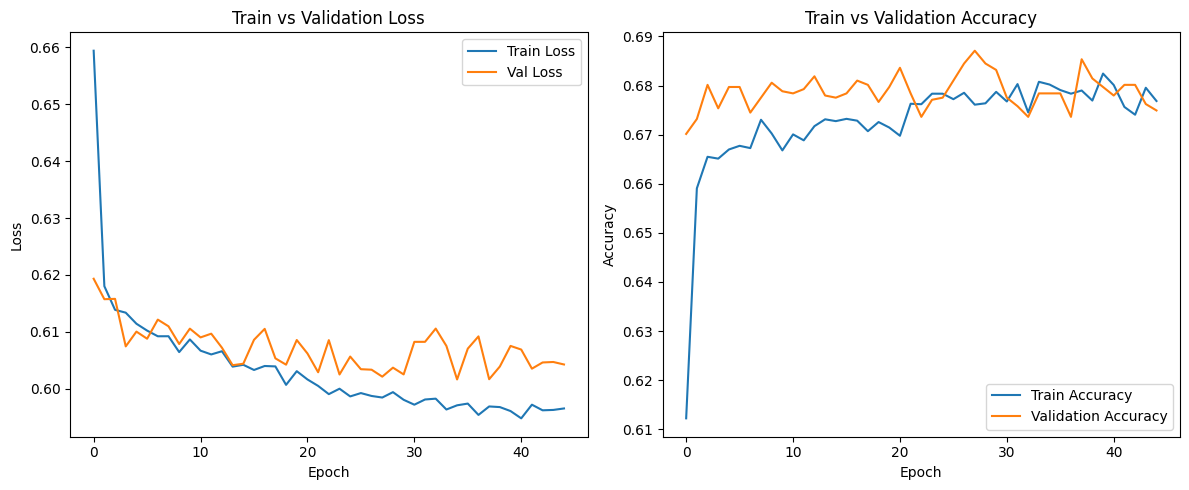

In [ ]:
# Vizualizacija Loss i Accuracy za PyTorch model
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Train vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
